# Final Project: Data Visualization with Python

## Introduction
- **Project Title:** Spotify 2024

## Project Motivation and Objective
The motivation for this project stems from a school seminar in the area of data visualization. The main objective is to analyze the most streamed songs on Spotify in 2024.


## Research Question
------------------------------------------------------------------------

## Dataset Information
- **Source:** _Spotify_
- **Description:** This dataset contains information about the most streamed Spotify songs in 2024, including various attributes of the songs and artists.
- **Link:** https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024/data

### Data Collection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline
import seaborn as sb

data = pd.read_csv("../data/Most Streamed Spotify Songs 2024.csv",encoding='latin1')

data.head()
data.info()
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


<Axes: >

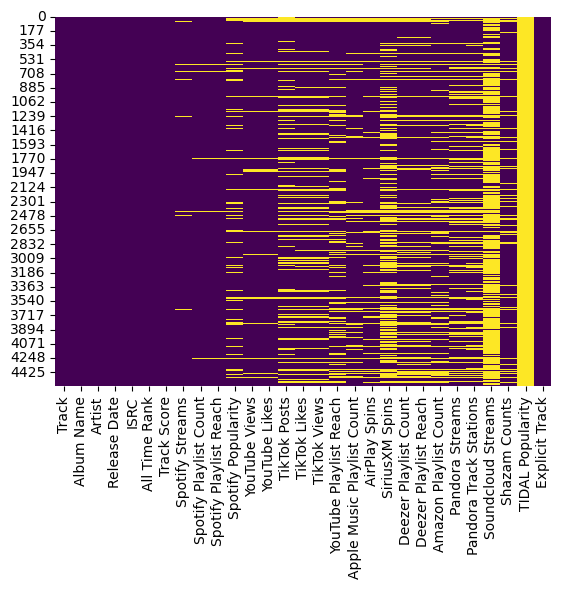

In [4]:
sb.heatmap(data.isnull(),cbar=False,cmap='viridis')

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

<Axes: ylabel='Percent'>

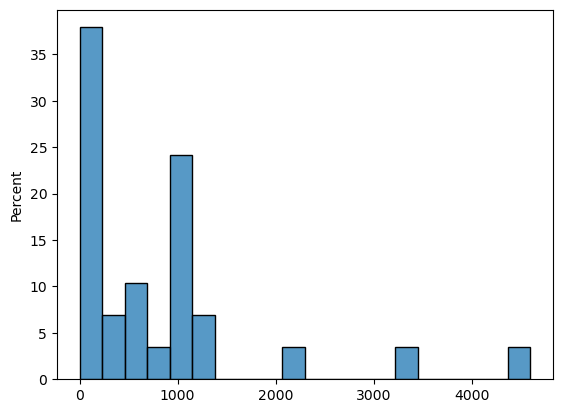

In [5]:
# Missing values analysis

navalues=data.isnull().sum()
print(navalues)
sb.histplot(navalues,stat='percent',bins=20)

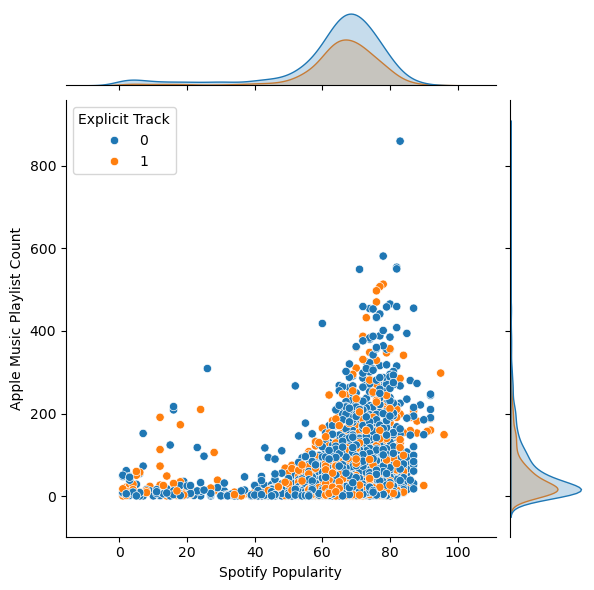

In [6]:
sb.jointplot(x='Spotify Popularity',y='Apple Music Playlist Count',hue='Explicit Track',data=data[data['Spotify Popularity']>0],kind='scatter')

In [7]:
# Modelo de regresión logística

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
X=data[['Track Score','Spotify Popularity','Apple Music Playlist Count','Deezer Playlist Count']].fillna(0)
y=data['Explicit Track']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101)

In [9]:
mod=LogisticRegression()
mod.fit(X_train,y_train)

LogisticRegression()

In [10]:
# Prediction and Evaluation

preds=mod.predict(X_test)

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(classification_report(y_test,preds))
print(mean_absolute_error(y_test,preds))
print(mean_squared_error(y_test,preds))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77       867
           1       0.55      0.04      0.07       513

    accuracy                           0.63      1380
   macro avg       0.59      0.51      0.42      1380
weighted avg       0.60      0.63      0.51      1380

0.3695652173913043
0.3695652173913043


# Conclusion

First it started by visulaizing the data from the biggest songs in the platform:
Then we have a heatmap to analise values that have NA or even lost.
    in that we could see the colmuns that have mone NA are Tydal popularity and soudclouds streams
    Tydal popularity has more than 4600 lost values

Then we go to joint plot that relates spotify popularity with acounts of appple music playlists 
    and it differs them into 2 groups which are: 1 For explicit tracks and 0 for non explicit
    so it means that the more popular a song is in spotify the more playlist have it in apple music
    abut explicit tracjks we cant conclude anything because they have the same distribuition

# Machine Learning Part
I started by doing logisitc regresion where we selected the explanatory variaton that represents $ 
    collumns and cleaned the data in it taking out the NA values with 0. Which werw all numerical values.
    The explained variable was explicit track.which is 0 and 1.
    
    In the model we can see that the presision of our model is 63% .And it explains the 63% of variability of the explicit track variable.
    With a average absolute error of 0.3695...

    Conclusion: In general this model is not suitable enouth to calculate exactly the relationship of explicit tracks but it still can give us an ideia.



